<a href="https://colab.research.google.com/github/regaarz/Technical_Assignment_2/blob/main/Rega_Arzula_Akbar_Technical_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*italicised<div align="center">
  <h1><strong>Technical Assignment #2</strong></h1>
  <table style="margin-bottom: 30px;">
    <tr>
      <th>Nama</th>
      <th>Kelompok</th>
      <th>Universitas</th>
    </tr>
    <tr>
      <td>Rega Arzula Akbar</td>
      <td>27</td>
      <td>Universitas Telkom</td>
    </tr>
  </table>
  
  ---------------
  
  <h1><strong>Dataset AI4I 2020 Predictive Maintenance</strong></h1>
</div>
 text*

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [180]:
df = pd.read_csv("/content/ai4i2020.csv")

In [181]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [183]:
df.shape

(10000, 14)

In [184]:
print(df.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

Preprocessing

In [185]:
duplicate_rows_df = df[df.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


In [186]:
df.count()

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Machine failure            10000
TWF                        10000
HDF                        10000
PWF                        10000
OSF                        10000
RNF                        10000
dtype: int64

In [187]:
df = df.drop_duplicates()
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [188]:
df.count()

UDI                        10000
Product ID                 10000
Type                       10000
Air temperature [K]        10000
Process temperature [K]    10000
Rotational speed [rpm]     10000
Torque [Nm]                10000
Tool wear [min]            10000
Machine failure            10000
TWF                        10000
HDF                        10000
PWF                        10000
OSF                        10000
RNF                        10000
dtype: int64

In [189]:
print(df.isnull().sum())

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [190]:
count_per_class = df['Machine failure'].value_counts()

print(count_per_class)

Machine failure
0    9661
1     339
Name: count, dtype: int64


Heatmap

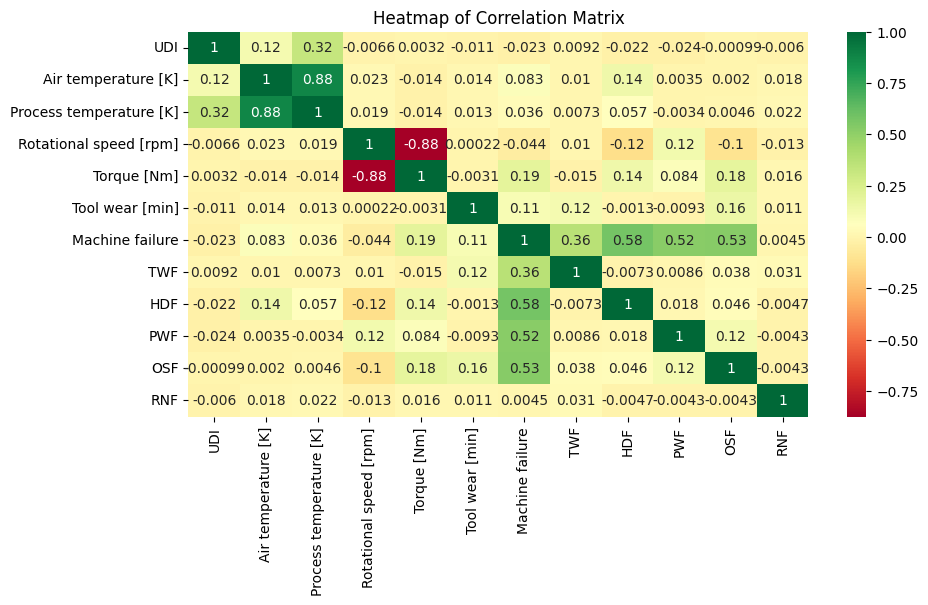

In [191]:
df_numerik = df.select_dtypes(include=['float64', 'int64'])
c = df_numerik.corr()

plt.figure(figsize=(10,5))
sns.heatmap(c, cmap="RdYlGn", annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [192]:
#feature engineer
df['Temp_Diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Wear_Rate'] = df['Torque [Nm]'] / (df['Rotational speed [rpm]'] + 1)

#drop kolom yang tidak digunakan
df = df.drop(columns=['UDI', 'Product ID'])

#features and target
x = df.drop(columns=['Machine failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']) #mengambil data selain dari yang didalam kurung
y = df['Machine failure'] #feature

#membedakan kolom tipe kategorikal dan numerikal untuk pipeline
categorical_cols = ['Type']
numerical_cols = x.columns.difference(categorical_cols)

#melakukan standarisasi dan encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols), #mengubah setiap fitur memiliki rata-rata 0 dan standar deviasi 1
        ('cat', OneHotEncoder(), categorical_cols) #mengubah dari kategorik menjadi numerik disesuaikan kolomnya agar bisa dilatih
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

x_transformed = pipeline.fit_transform(x)

encoded_cat_cols = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
feature_names = numerical_cols.tolist() + encoded_cat_cols.tolist()

x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=42, stratify=y) #split data latihan dan data tes

smote = SMOTE(random_state=42)#Menghandle data inbalance
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)


RandomForest

In [193]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(x_train, y_train)#fitting berdasarkan x_train dan y_train


y_pred = rf_model.predict(x_test) #preksi menggunakan x_test

accuracy = accuracy_score(y_test, y_pred) #akurasi score dari perbandingan y_test,y_pred
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.89      0.74      0.81        68

    accuracy                           0.99      2000
   macro avg       0.94      0.87      0.90      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[1926    6]
 [  18   50]]


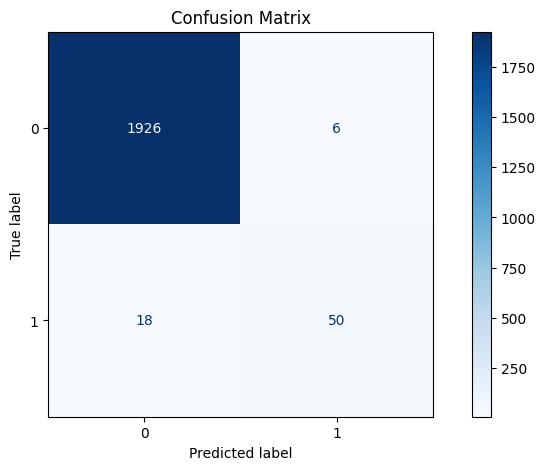

In [197]:
#plot confusion matrix
predictions = rf_model.predict(x_test)

# Hitung confusion matrix
cm = confusion_matrix(y_test, predictions, labels=rf_model.classes_)

# Buat plot confusion matrix dengan warna biru
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(10, 5))
disp.plot(cmap='Blues', ax=ax)  # Ubah cmap ke palet warna biru

# Atur judul dan label
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Tampilkan plot
plt.show()

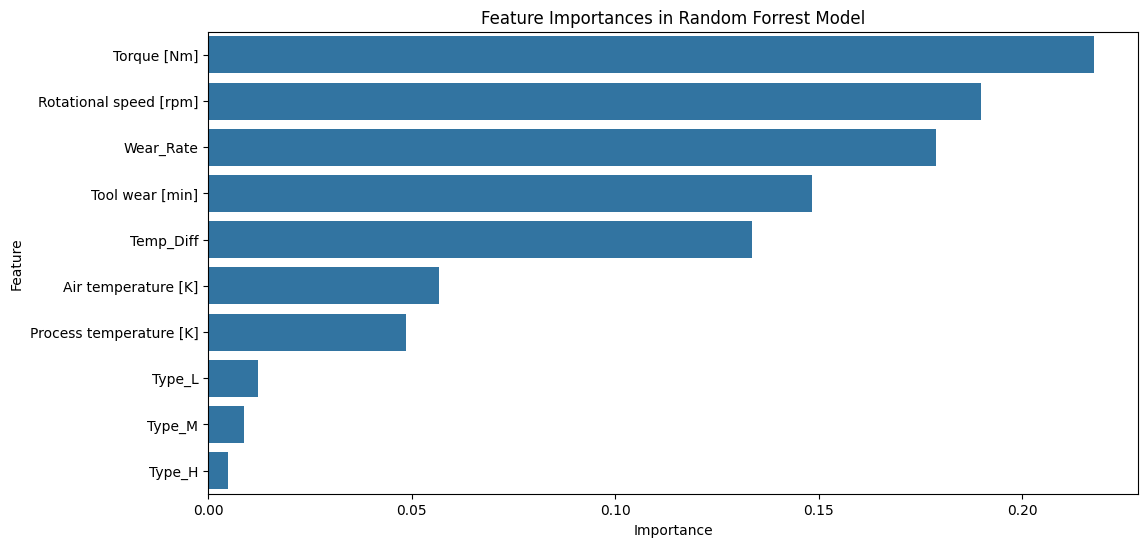

Detail Feature Importances:
                   Feature  Importance
5              Torque [Nm]    0.217629
2   Rotational speed [rpm]    0.190018
6                Wear_Rate    0.178947
4          Tool wear [min]    0.148498
3                Temp_Diff    0.133549
0      Air temperature [K]    0.056720
1  Process temperature [K]    0.048574
8                   Type_L    0.012189
9                   Type_M    0.008912
7                   Type_H    0.004963


In [204]:
importances = rf_model.feature_importances_

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forrest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Menampilkan nilai detail
print("Detail Feature Importances:")
print(feature_importances)

In [198]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(x_train, y_train)


y_pred_gb = gb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred_gb))

cm_ = confusion_matrix(y_test, y_pred_gb)
print(f'Confusion Matrix:\n{cm_}')

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.90      0.76      0.83        68

    accuracy                           0.99      2000
   macro avg       0.94      0.88      0.91      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix:
[[1926    6]
 [  16   52]]


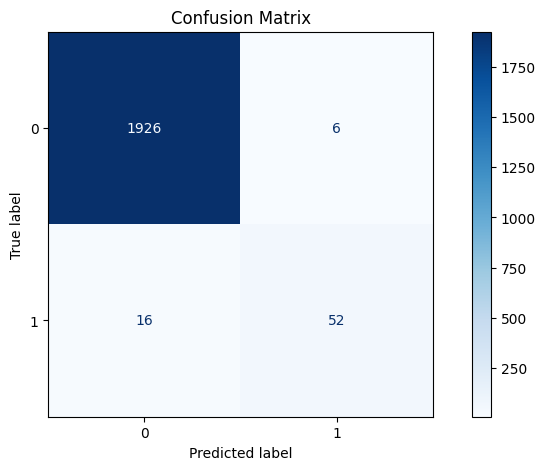

In [201]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = gb_model.predict(x_test)

# Hitung confusion matrix
cm_ = confusion_matrix(y_test, predictions, labels=gb_model.classes_)

# Buat plot confusion matrix dengan warna biru
disp = ConfusionMatrixDisplay(confusion_matrix=cm_, display_labels=gb_model.classes_)
fig, ax = plt.subplots(figsize=(10, 5))
disp.plot(cmap='Blues', ax=ax)  # Ubah cmap ke palet warna biru

# Atur judul dan label
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Tampilkan plot
plt.show()

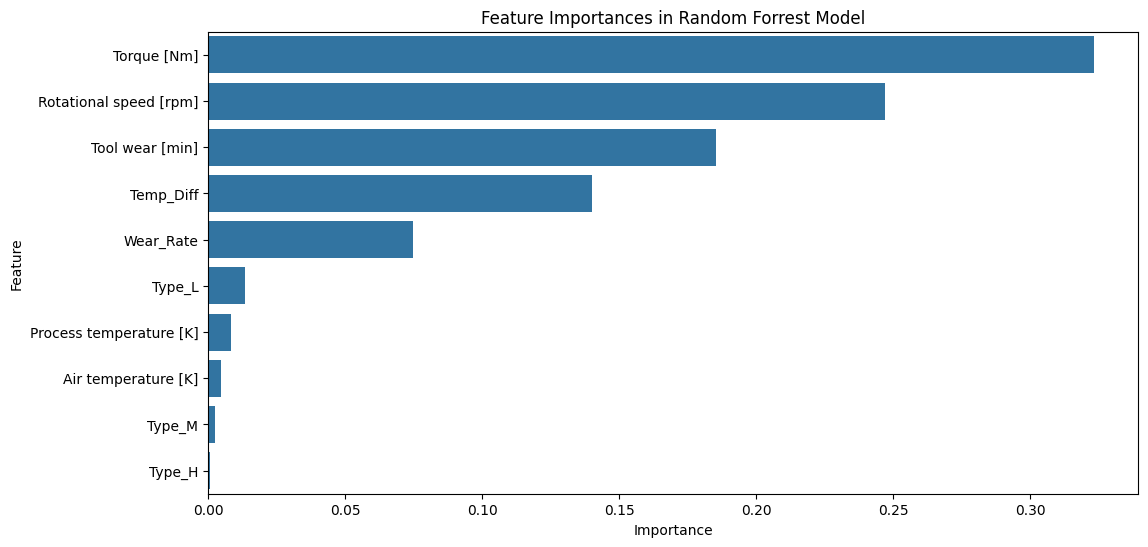

Detail Feature Importances:
                   Feature  Importance
5              Torque [Nm]    0.323076
2   Rotational speed [rpm]    0.246765
4          Tool wear [min]    0.185376
3                Temp_Diff    0.140086
6                Wear_Rate    0.074913
8                   Type_L    0.013503
1  Process temperature [K]    0.008314
0      Air temperature [K]    0.004643
9                   Type_M    0.002698
7                   Type_H    0.000628


In [205]:
importances = gb_model.feature_importances_

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forrest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Menampilkan nilai detail
print("Detail Feature Importances:")
print(feature_importances)